In [3]:
from dblinea import DBBase
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import os

In [4]:
db=DBBase()
schema = "des_dr2"  
tablename = "des_dr2.public_pz_training_set"

```sql

SELECT FLAGS_G
FROM des_dr2.public_pz_training_set
WHERE mag_auto_i_dered<23 AND mag_auto_g_dered - mag_auto_r_dered BETWEEN -10.0 AND 10.0 AND mag_auto_r_dered - mag_auto_i_dered BETWEEN -10.0 AND 10.0 AND mag_auto_i_dered - mag_auto_z_dered BETWEEN -10.0 AND 10.0 AND mag_auto_z_dered - mag_auto_y_dered BETWEEN -10.0 AND 10.0



```



In [8]:
query = 'SELECT FLAGS_G FROM des_dr2.coadd_objects WHERE mag_auto_i_dered<23 AND mag_auto_g_dered - mag_auto_r_dered BETWEEN -10.0 AND 10.0 AND mag_auto_r_dered - mag_auto_i_dered BETWEEN -10.0 AND 10.0 AND mag_auto_i_dered - mag_auto_z_dered BETWEEN -10.0 AND 10.0 AND mag_auto_z_dered - mag_auto_y_dered BETWEEN -10.0 AND 10.0 LIMIT 10'


In [9]:
df_origin = db.fetchall_df(query)

In [10]:
df_origin

,flags_g
0,2
1,0
2,0
3,0
4,0
5,2
6,3
7,3
8,3
9,0


In [8]:
g = df['mag_auto_g_dered']
r = df['mag_auto_r_dered']
i = df['mag_auto_i_dered']
z = df['mag_auto_z_dered']
y = df['mag_auto_y_dered']

df['g-r'] = g-r
df['r-i'] = r-i
df['i-z'] = i-z
df['z-y'] = z-y

## Table per survey

In [11]:
surveys = set(spec_sample['source'])
survey=[]
matchings=[]
z_mean=[]
z_max=[]
z_min=[]
for surv in surveys:
    survey.append(surv)
    mask = spec_sample[spec_sample['source']==surv]
    matchings.append(len(mask))
    z_mean.append(round(np.mean(mask['z']),2))
    z_max.append(round(max(mask['z']),2))
    z_min.append(round(min(mask['z']),2))
    

In [12]:
table = pd.DataFrame({'survey':survey, 'matchings':matchings, 'z_mean':z_mean, 'z_min':z_min, 'z_max':z_max})

In [13]:
table.sort_values(by='matchings', ascending = False)

,survey,matchings,z_mean,z_min,z_max
2,SDSS_DR14,146877,0.52,0.00,1.98
16,PRIMUS,78940,0.55,0.02,4.72
10,2DF,54295,0.12,0.00,3.00
24,VIPERS,44354,0.69,0.04,2.00
21,6DF,32429,0.07,0.00,3.38
11,GAMA,28637,0.22,0.00,0.79
25,2dFLenS,24363,0.35,0.00,4.69
0,WIGGLEZ,15954,0.56,0.00,4.24
23,DEEP2,7801,0.93,0.01,2.16
20,VVDS,6087,0.57,0.01,3.84


## Looking the 12 largest catalogs

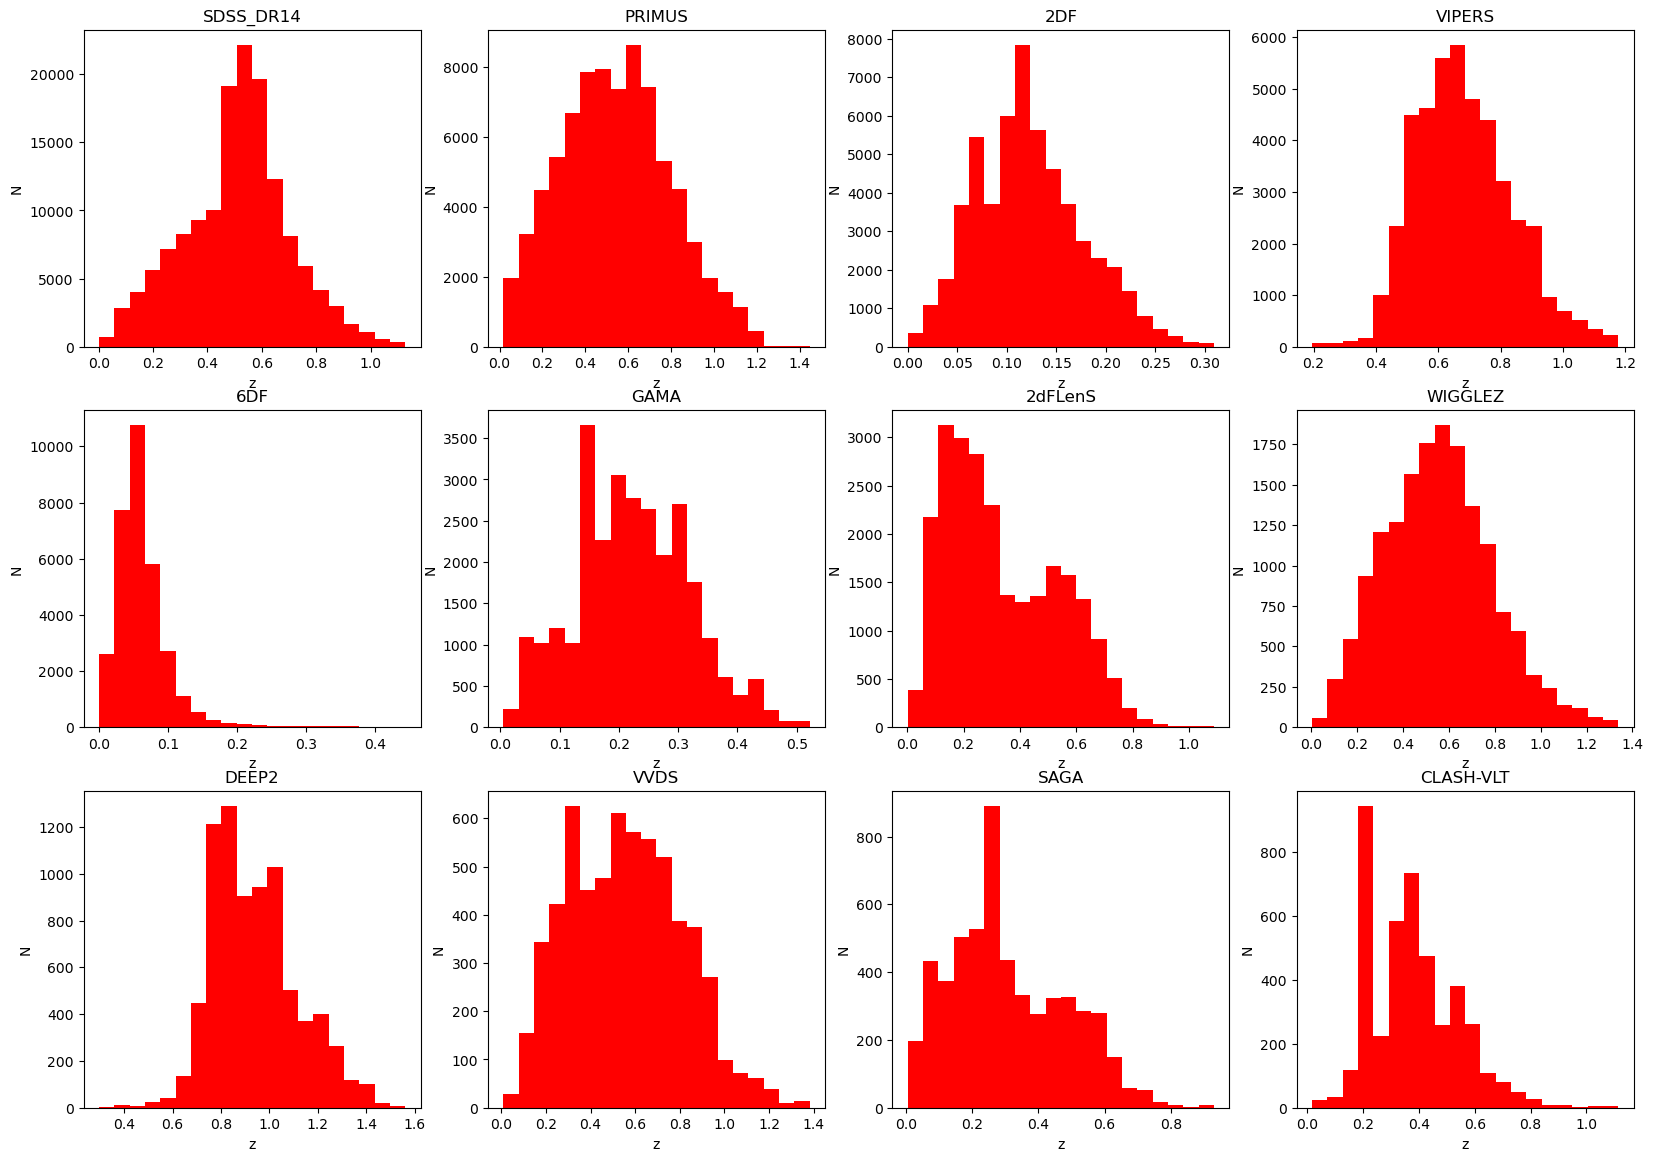

In [53]:
element_count = spec_sample['source'].value_counts().reset_index()
i=1
plt.figure(figsize = (20,14))
for catalog in element_count[:12]['source']:
    redshift = df[df['source'] == catalog]['z']
    plt.subplot(3, 4, i)
    plt.xlabel('z')
    plt.ylabel('N')
    std = np.std(redshift)
    mean = np.mean(redshift)
    redshift = redshift[(redshift< mean+3*std) & (redshift> mean-3*std)] #removing outliers with 3 std
    plt.hist(redshift, bins = 20, color = 'red')
    plt.title(catalog)
    i+=1


## View of the sky

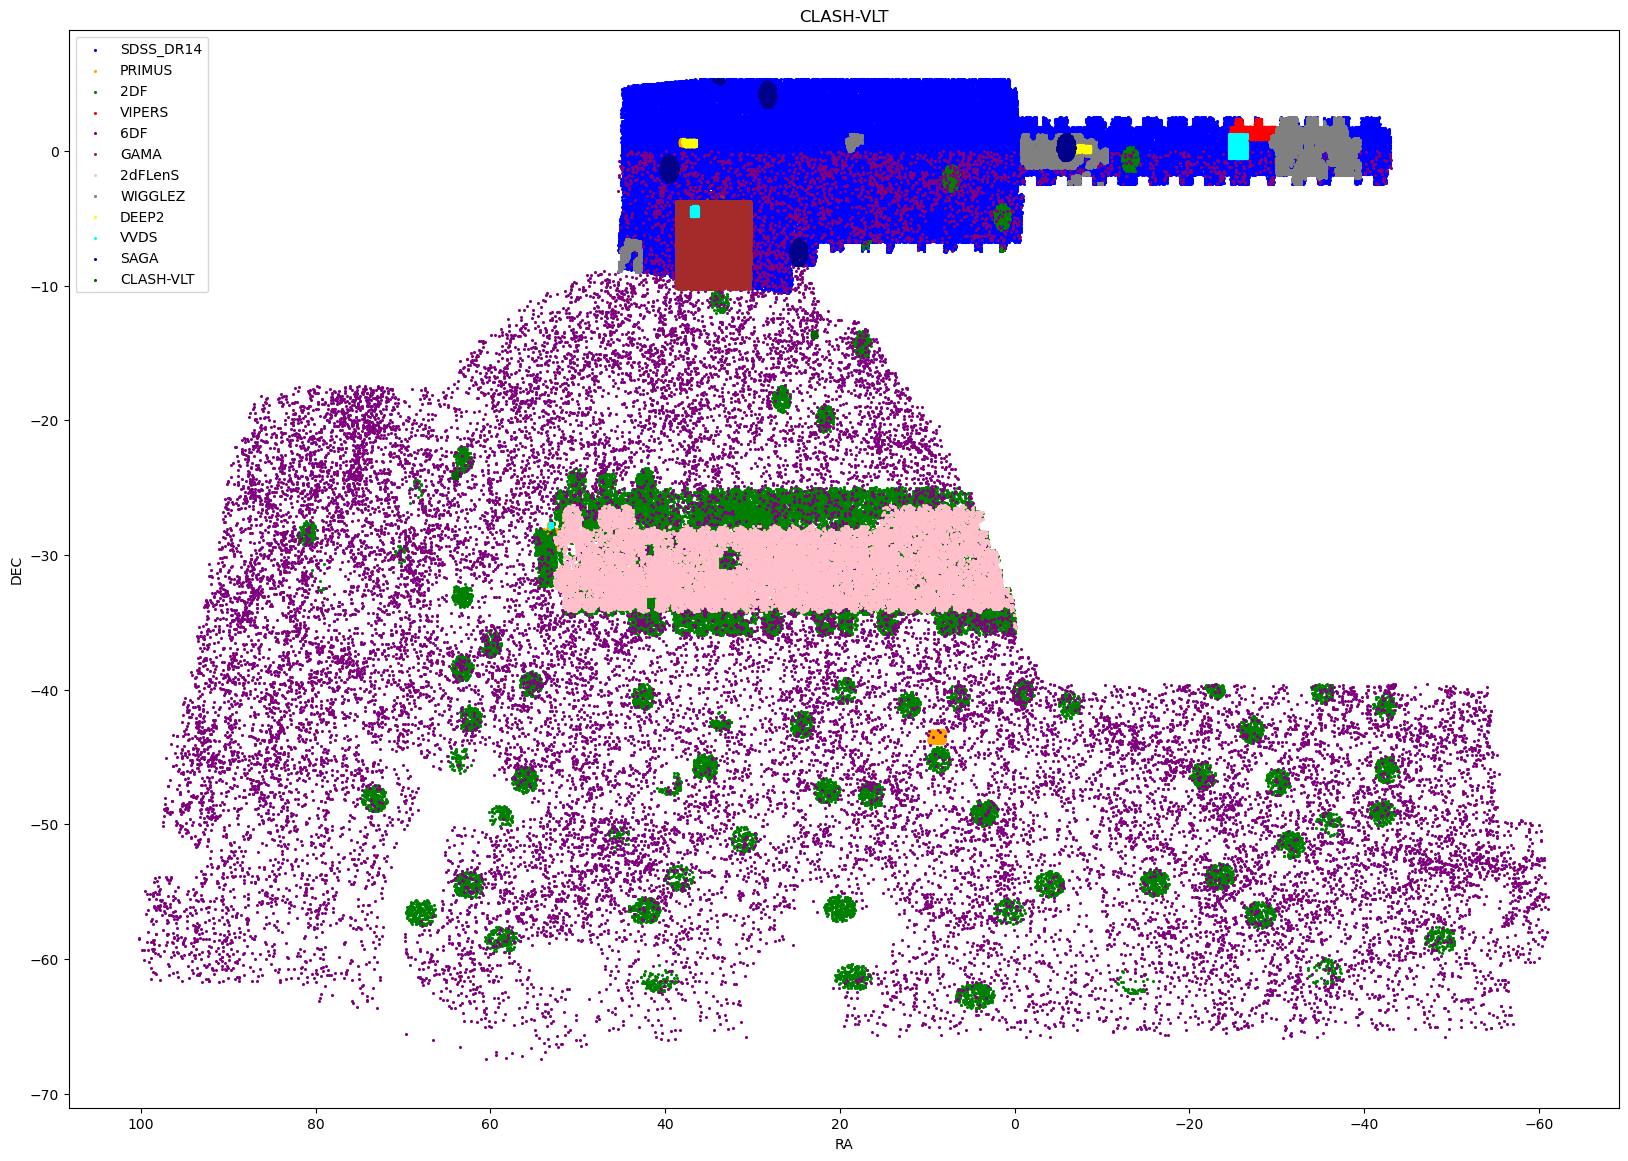

In [49]:
i=0
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'yellow', 'cyan', 'darkblue', 'darkgreen']
spec_sample.loc[spec_sample['ra']>150,'ra'] = spec_sample[spec_sample['ra']>150]['ra'] - max(spec_sample['ra']) #For 'tank' format
plt.figure(figsize = (20,14))

for catalog in element_count[:12]['source']:
    ra = spec_sample[spec_sample['source'] == catalog]['ra']
    dec = spec_sample[spec_sample['source'] == catalog]['dec']
    plt.scatter(ra, dec, color = colors[i], s=1.5 , label = catalog)
    plt.title(catalog)
    i+=1
plt.xlabel('RA')
plt.ylabel('DEC')
plt.legend(loc = 2)
plt.gca().invert_xaxis()
plt.show()

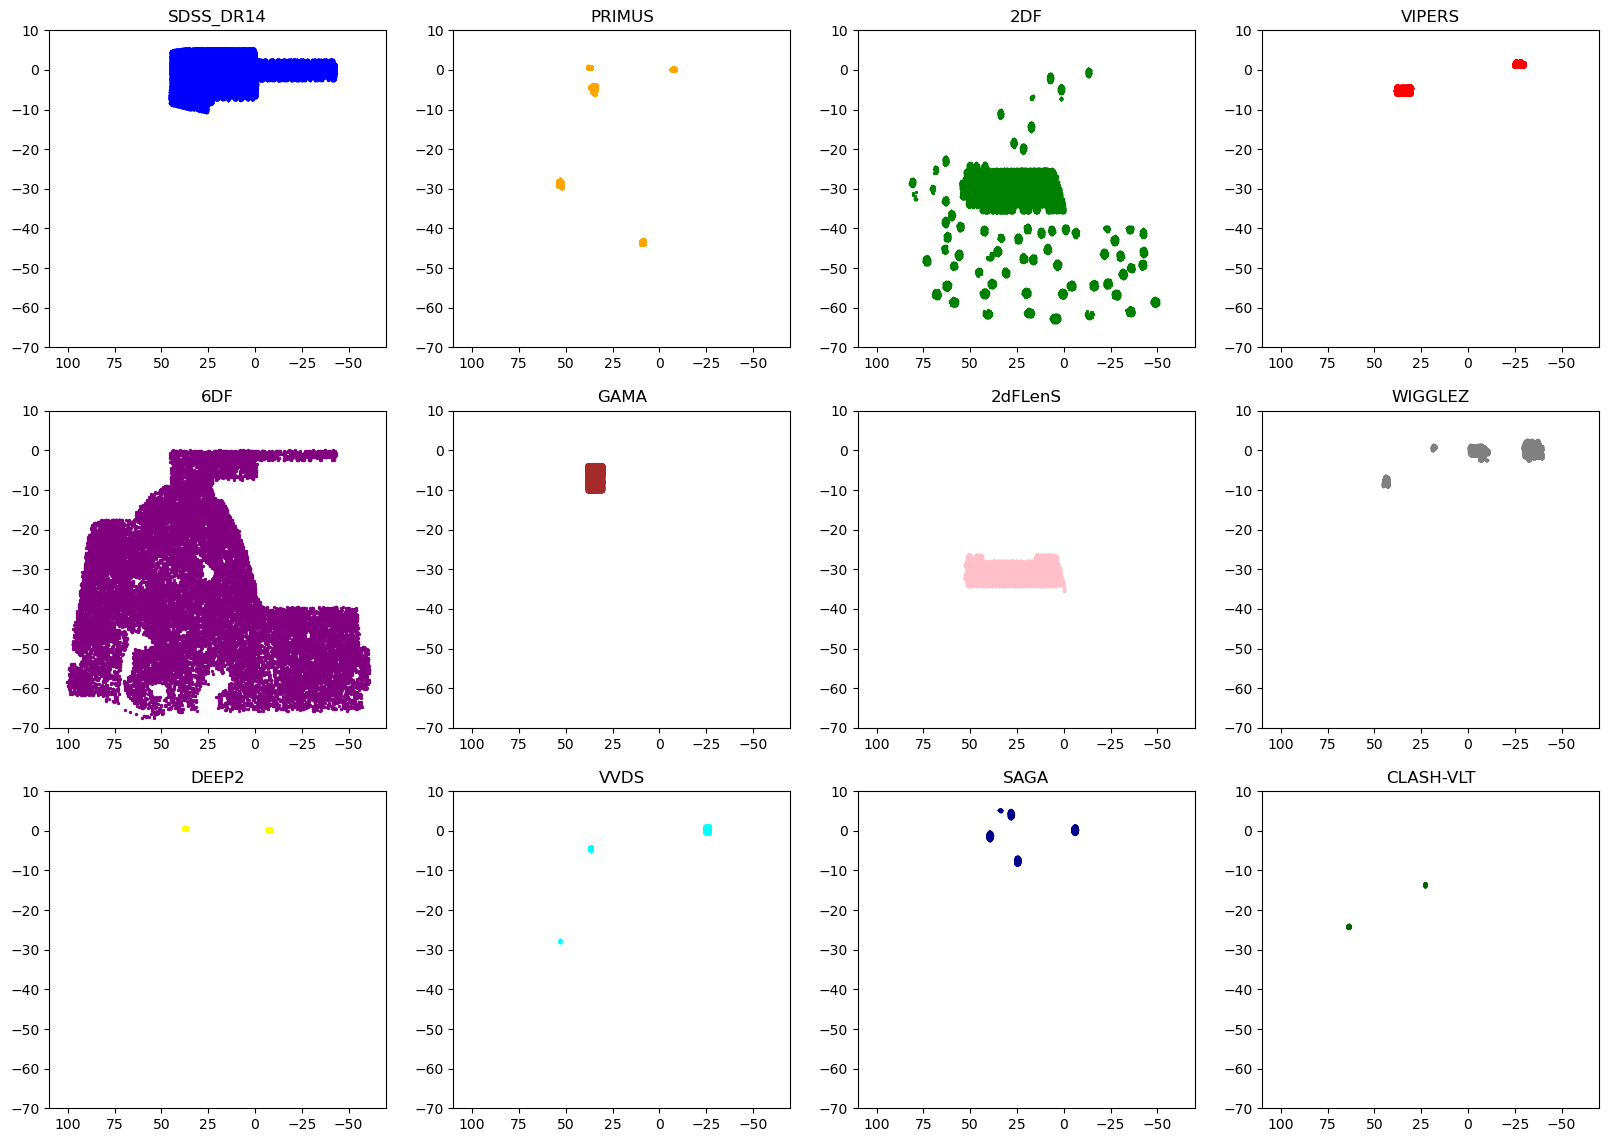

In [50]:
i=0
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'yellow', 'cyan', 'darkblue', 'darkgreen']
plt.figure(figsize = (20,14))
for catalog in element_count[:12]['source']:
    ra = spec_sample[spec_sample['source'] ==catalog]['ra']
    dec = spec_sample[spec_sample['source'] ==catalog]['dec']
    plt.subplot(3,4,i+1)
    plt.scatter(ra, dec, color = colors[i], s=2)
    plt.xlim((110,-70))
    plt.ylim((-70,10))
    plt.title(catalog)
    i+=1
plt.show()

# Query for random phot samples

In [12]:
tablename2 = "coadd_objects"

```sql
SELECT erra_image, ra, dec, extended_class_coadd, mag_auto_g, mag_auto_r, mag_auto_i, mag_auto_z, mag_auto_y, magerr_auto_g, magerr_auto_r, magerr_auto_i, magerr_auto_z, magerr_auto_y 
FROM des_dr2.coadd_objects 
WHERE extended_class_coadd>=2 AND erra_image>{}
AND mag_auto_i<23 AND mag_auto_g<99 AND mag_auto_r<99 AND mag_auto_z<99 AND mag_auto_y<99
ORDER BY RANDOM()
LIMIT 10000;

```

In [13]:


query2 = 'SELECT ra, dec, extended_class_coadd, mag_auto_g, mag_auto_r, mag_auto_i, mag_auto_z, mag_auto_y, magerr_auto_g, magerr_auto_r, magerr_auto_i, magerr_auto_z, magerr_auto_y FROM des_dr2.coadd_objects WHERE extended_class_coadd>=2 AND mag_auto_i<23 AND mag_auto_g<99 AND mag_auto_r<99 AND mag_auto_z<99 AND mag_auto_y<99 ORDER BY RANDOM() LIMIT 400000;'



In [15]:
%%time
phot_sample = db.fetchall_df(query2)

CPU times: user 5.57 s, sys: 504 ms, total: 6.07 s
Wall time: 38min 25s


# Spec and Phot samples

In [74]:
phot_sample

,ra,dec,extended_class_coadd,mag_auto_g,mag_auto_r,mag_auto_i,mag_auto_z,mag_auto_y,magerr_auto_g,magerr_auto_r,magerr_auto_i,magerr_auto_z,magerr_auto_y
0,49.556963,-21.028491,3,23.186836,22.232197,22.084179,22.128864,22.396326,0.065643,0.036696,0.053424,0.116999,0.558982
1,57.489527,-40.820456,3,21.912027,20.935930,20.579214,20.324842,20.289139,0.026972,0.014822,0.019042,0.028377,0.074809
2,78.774501,-18.774237,3,23.175503,21.530241,20.724058,20.276337,20.294094,0.075254,0.021815,0.016589,0.023594,0.089820
3,31.320014,-23.613349,3,22.798882,22.319490,22.098320,21.992071,22.575787,0.043947,0.035828,0.050866,0.097053,0.530726
4,327.434440,-47.044763,3,22.551046,21.427937,20.957968,20.537922,20.720009,0.039134,0.019939,0.022129,0.029908,0.099290
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,9.551070,-56.704569,2,23.009024,22.514217,22.382427,21.702839,20.377659,0.116934,0.093353,0.151265,0.139123,0.131558
399996,25.562342,-26.662990,3,22.857111,20.921244,20.157000,19.776896,19.612671,0.067777,0.015130,0.012705,0.019166,0.051643
399997,31.546823,-55.112598,3,23.194792,23.146099,22.826437,22.757935,22.701828,0.046979,0.067976,0.095419,0.158355,0.493878
399998,342.323177,-46.417701,3,25.765619,23.849592,22.593399,21.830727,21.847301,0.747764,0.210663,0.121808,0.113891,0.299046


In [76]:
spec_sample_contour = spec_sample.sample(n=len(phot_sample))

In [77]:
spec_sample_contour

,spec_id,z,err_z,flag,source,flag_des,coadd_object_id,ra,dec,mag_auto_g_dered,...,mag_auto_y_dered,magerr_auto_g,magerr_auto_r,magerr_auto_i,magerr_auto_z,magerr_auto_y,g-r,r-i,i-z,z-y
59852,882549,0.610570,99.000000,3.0,2dFLenS,3,1121209318,14.052617,-33.590656,22.227880,...,19.052944,0.052087,0.014865,0.010145,0.015549,0.036617,1.697203,0.947054,0.410788,0.119892
383058,1400697,0.595102,0.000253,0.0,SDSS_DR14,4,1213123337,28.634692,1.023284,22.034115,...,19.235292,0.042790,0.015331,0.012007,0.014780,0.052154,1.470570,0.860178,0.395428,0.072647
318254,1030005,0.472600,99.000000,4.5,VIPERS,4,948191020,332.497621,2.037948,24.010359,...,22.707727,0.154193,0.071545,0.085992,0.147982,0.963731,1.264349,0.287903,0.151913,-0.401533
447941,589335,0.584506,99.000000,4.0,PRIMUS,4,1400271424,53.941295,-28.988060,23.603373,...,21.298981,0.079914,0.030939,0.031510,0.038246,0.171964,1.296503,0.701544,0.343460,-0.037115
30155,496502,0.676213,99.000000,3.0,PRIMUS,3,1086647510,9.222328,-43.771765,22.865786,...,20.686678,0.113552,0.099679,0.126557,0.137343,0.161847,0.315308,0.495474,0.435459,0.932867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28369,135493,0.075966,0.000150,4.0,6DF,4,1030504451,359.433752,-0.174918,15.800213,...,14.080675,0.000687,0.000442,0.000469,0.000590,0.001996,0.853775,0.385652,0.299531,0.180580
282963,32352,1.320500,99.000000,3.0,VVDS,3,1278932312,36.877772,-4.395733,23.084682,...,22.529539,0.065034,0.059994,0.085503,0.103357,0.418702,0.303408,0.248898,0.555010,-0.552172
308009,65810,0.337150,99.000000,4.0,WIGGLEZ,4,930821378,325.608974,2.265914,22.570118,...,21.060160,0.063967,0.037674,0.049052,0.060108,0.220620,0.795858,0.225586,0.246897,0.241617
360333,1358890,0.346399,0.000085,0.0,SDSS_DR14,4,1067923252,6.543690,3.776372,20.215874,...,17.690248,0.016547,0.004303,0.005018,0.006679,0.020528,1.593575,0.532986,0.305950,0.093115


In [124]:
gr_spec = spec_sample['mag_auto_g_dered']-spec_sample['mag_auto_r_dered']
ri_spec = spec_sample['mag_auto_r_dered']-spec_sample['mag_auto_i_dered']
iz_spec = spec_sample['mag_auto_i_dered']-spec_sample['mag_auto_z_dered']
gr_phot = phot_sample_contour['mag_auto_g']-phot_sample_contour['mag_auto_r']
ri_phot = phot_sample_contour['mag_auto_r']-phot_sample_contour['mag_auto_i']
iz_phot = phot_sample_contour['mag_auto_i']-phot_sample_contour['mag_auto_z']

## Graphs

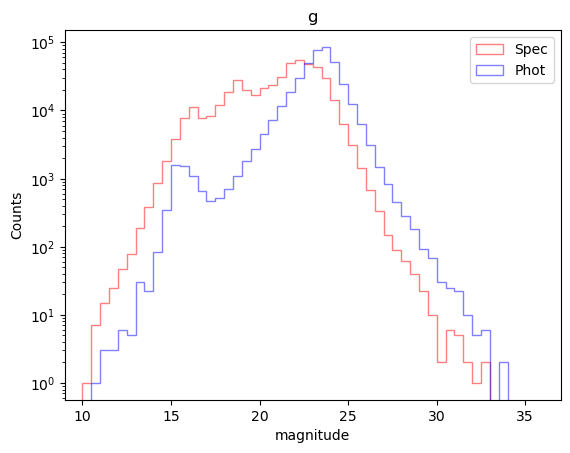

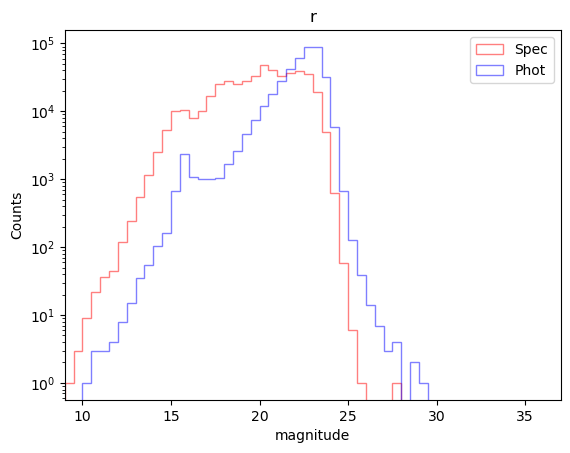

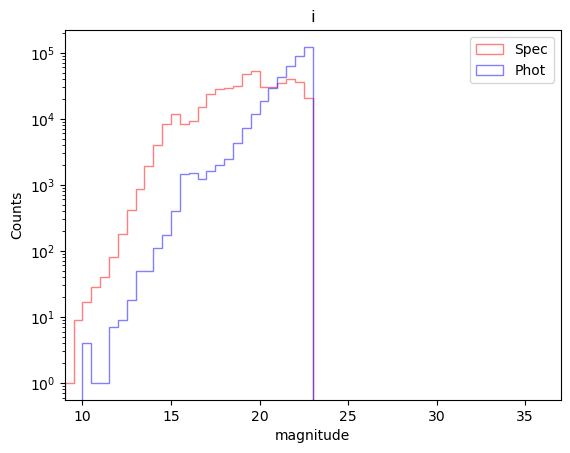

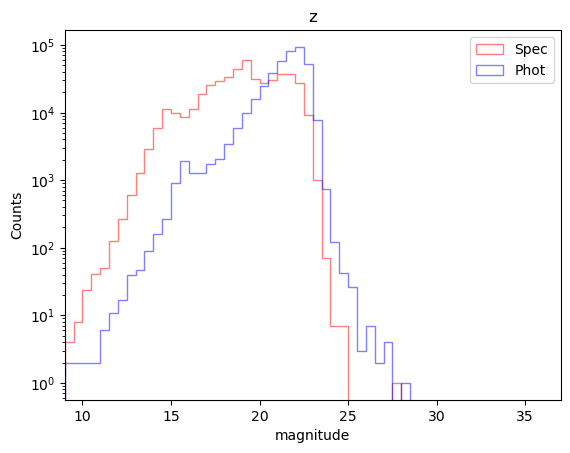

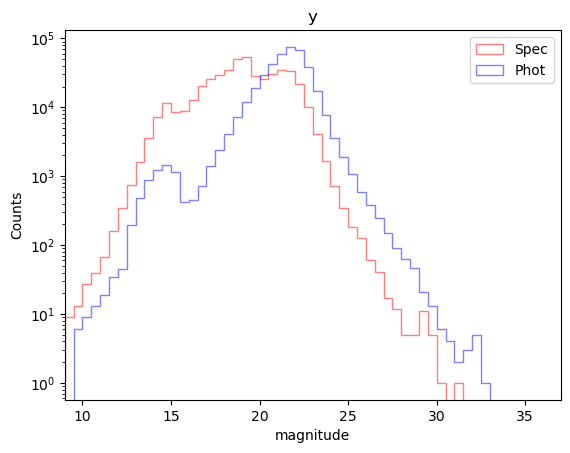

In [125]:
bands = ['g', 'r', 'i', 'z', 'y']
colors = ['blue', 'green', 'red', 'orange', 'purple']
plt.figure()
bins = np.linspace(9, 37, 57)
for i, (band, color) in enumerate(zip(bands,colors)):
    plt.hist(spec_sample[f'mag_auto_{band}_dered'], histtype='step', bins=bins, label='Spec', alpha = 0.5, edgecolor = "red")
    plt.hist(phot_sample[f'mag_auto_{band}'], histtype='step', bins=bins, label='Phot', alpha = 0.5, edgecolor = "blue")
    plt.title(band)
    plt.xlabel("magnitude")
    plt.ylabel("Counts")
    plt.xlim(9, 37)
    plt.yscale('log')
    plt.legend()
    plt.show()

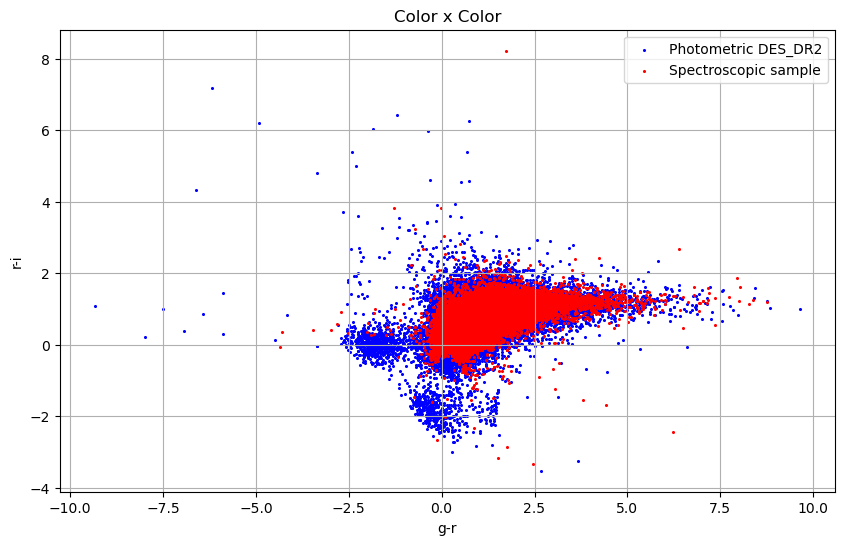

In [126]:
plt.figure(figsize = (10,6))
plt.scatter(gr_phot,ri_phot,color = 'blue', s =1.5, label = 'Photometric DES_DR2')
plt.scatter(gr_spec,ri_spec,color = 'red', s=1.5, label = 'Spectroscopic sample')
plt.xlabel('g-r')
plt.ylabel('r-i')
plt.legend()
plt.grid()
plt.title('Color x Color')
plt.savefig('cor-cor.png', dpi=300)

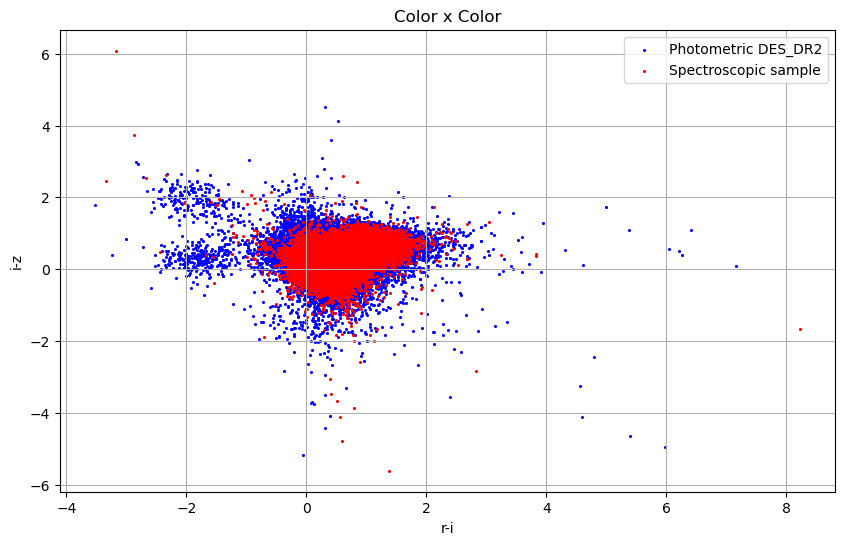

In [127]:
plt.figure(figsize = (10,6))
plt.scatter(ri_phot,iz_phot,color = 'blue', s =1.5, label = 'Photometric DES_DR2')
plt.scatter(ri_spec,iz_spec,color = 'red', s=1.5, label = 'Spectroscopic sample')
plt.xlabel('r-i')
plt.ylabel('i-z')
plt.legend()
plt.grid()
plt.title('Color x Color')
plt.savefig('cor-cor2.png', dpi=300)

# Spec analyses

## Mag distribution

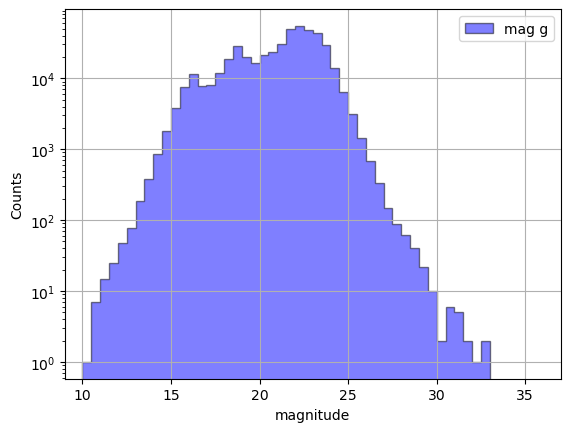

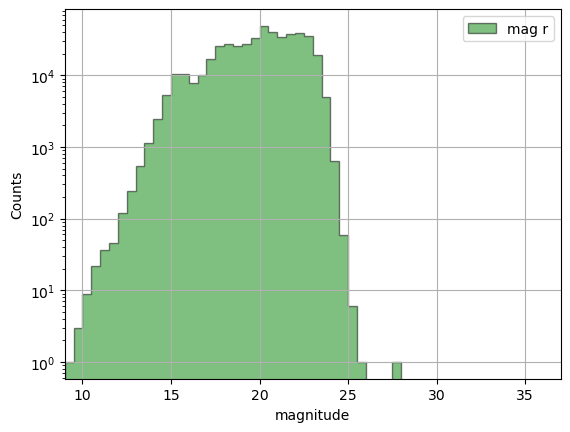

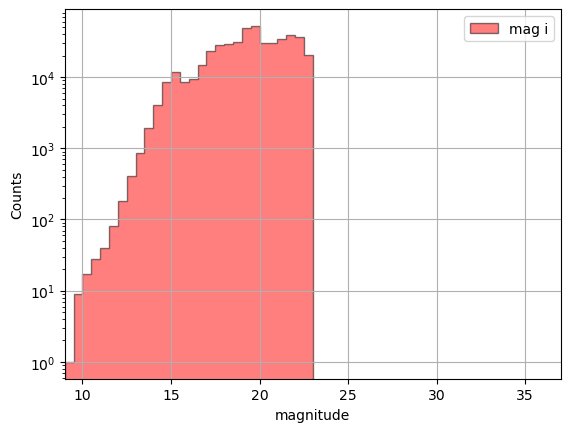

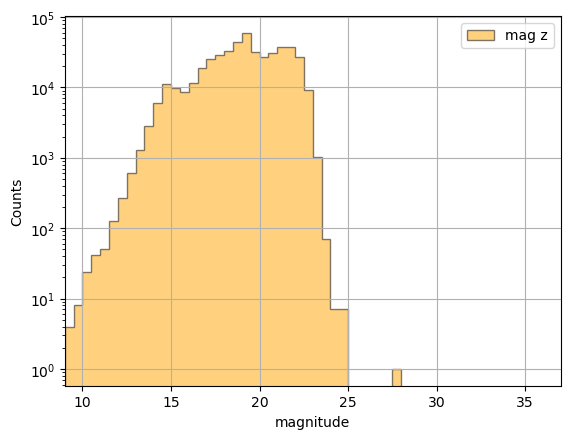

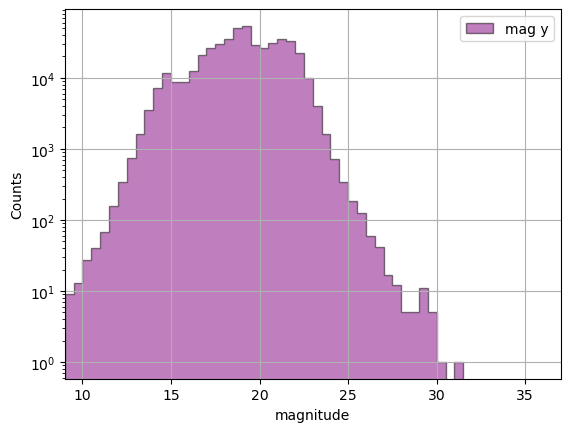

In [128]:
bands = ['g', 'r', 'i', 'z', 'y']
colors = ['blue', 'green', 'red', 'orange', 'purple']
plt.figure()
bins = np.linspace(9, 37, 57)
for i, (band, color) in enumerate(zip(bands,colors)):
    plt.hist(spec_sample[f'mag_auto_{band}_dered'], histtype='stepfilled', bins=bins, label=f'mag {band}', alpha = 0.5, edgecolor = "black", color = color)
    plt.xlabel("magnitude")
    plt.ylabel("Counts")
    plt.xlim(9, 37)
    plt.yscale('log')
    plt.legend()
    plt.grid(True)
    plt.show()

## Diagram mag x color for spec sample

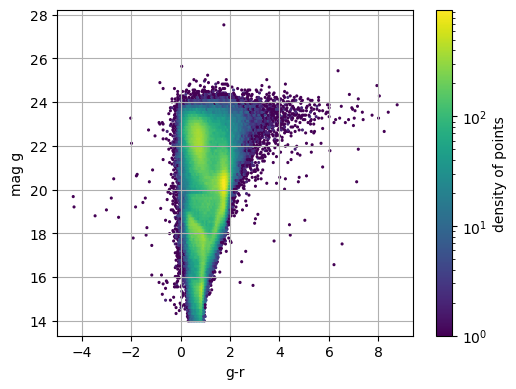

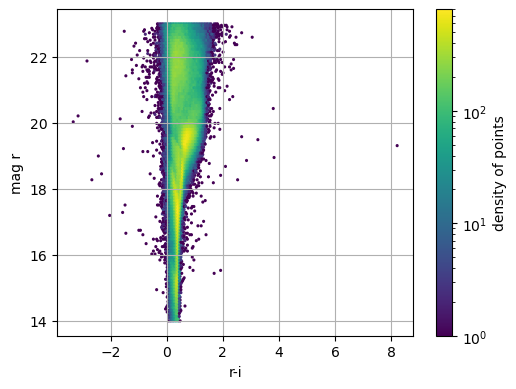

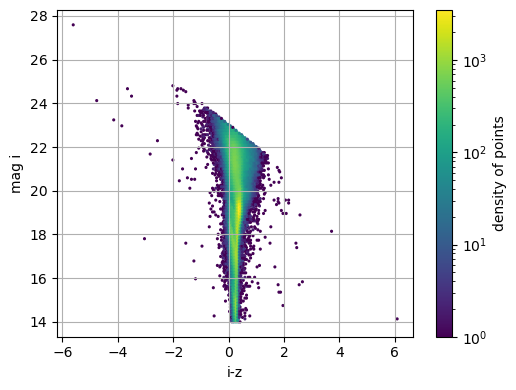

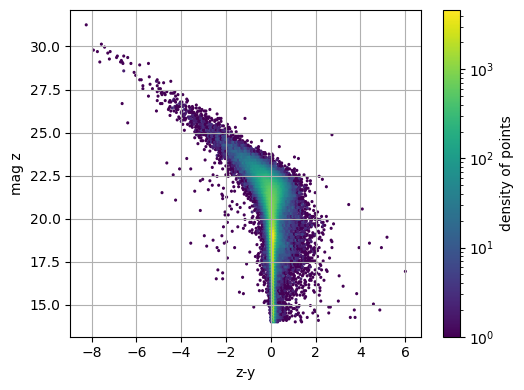

In [129]:
bands = ['g', 'r', 'i', 'z', 'y']
mag_diff = {}
for band,_band in zip(bands, bands[1::]):
    plt.figure(figsize=[10,4])
    plt.subplot(121)
    mag_diff = np.array(spec_sample[f'mag_auto_{band}_dered']) - np.array(spec_sample[f'mag_auto_{_band}_dered'])
    mag = np.array(spec_sample[f'mag_auto_{_band}_dered'])
                   
    mask = (mag>14)&(mag<32)&(mag_diff<10)
    plt.hexbin(mag_diff[mask], mag[mask], None, mincnt=1, cmap='viridis', gridsize=[200,100], bins='log')
    cbar = plt.colorbar(label='density of points')
    plt.ylabel("mag "+band)
    plt.xlabel(f"{band}-{_band}")
    plt.grid(True)
    plt.tight_layout()

## Mag x errors

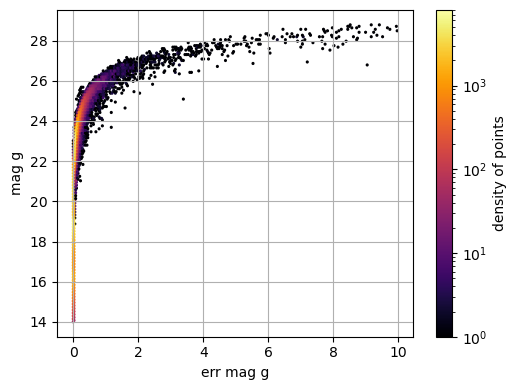

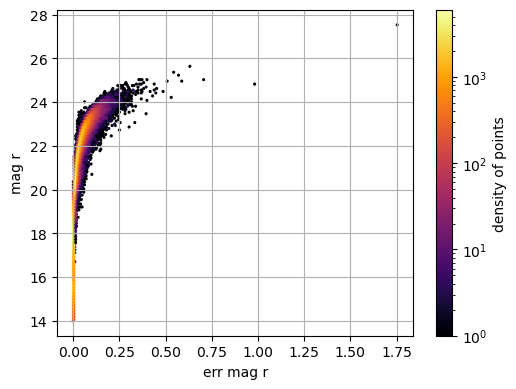

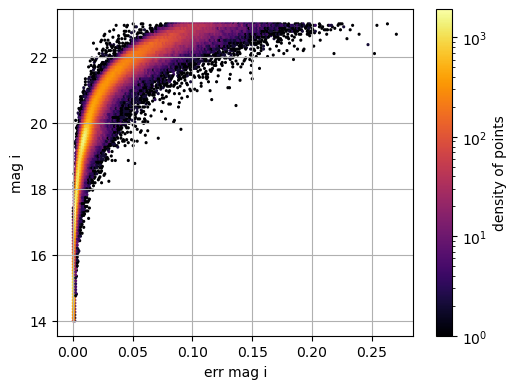

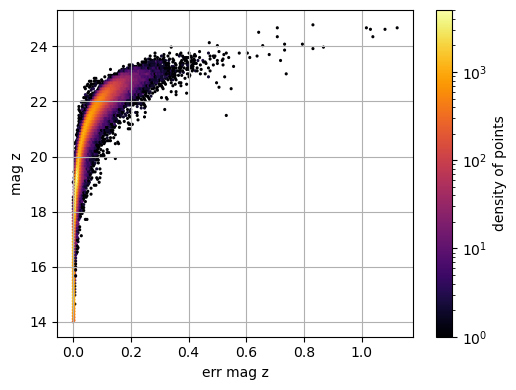

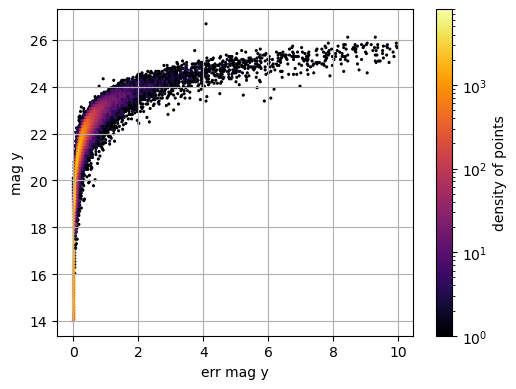

In [131]:
bands = ['g', 'r', 'i', 'z', 'y']
for i, band in enumerate(bands):
    plt.figure(figsize=[10,4])
    plt.subplot(121) 
    mag = np.array(spec_sample[f'mag_auto_{band}_dered'])
    err = np.array(spec_sample[f'magerr_auto_{band}'])
    mask = (mag>14)&(mag<32)&(err<10)
    plt.hexbin(err[mask], mag[mask], None, mincnt=1, cmap='inferno', gridsize=[200,100], bins='log')
    cbar = plt.colorbar(label='density of points')
    plt.ylabel("mag "+band)
    plt.xlabel("err mag "+band)
    plt.grid(True)
    plt.tight_layout()

## Cutting erros and separating in training and validation set

In [16]:
spec_sample = spec_sample[(spec_sample['magerr_auto_g']<2) & (spec_sample['magerr_auto_y']<2)]


In [17]:
training = spec_sample.sample(n=int(len(spec_sample)/2))
validation = spec_sample[~spec_sample.isin(training.to_dict(orient='list')).all(axis=1)]

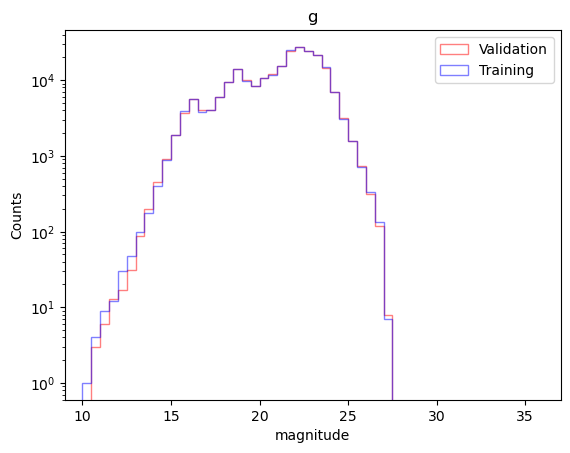

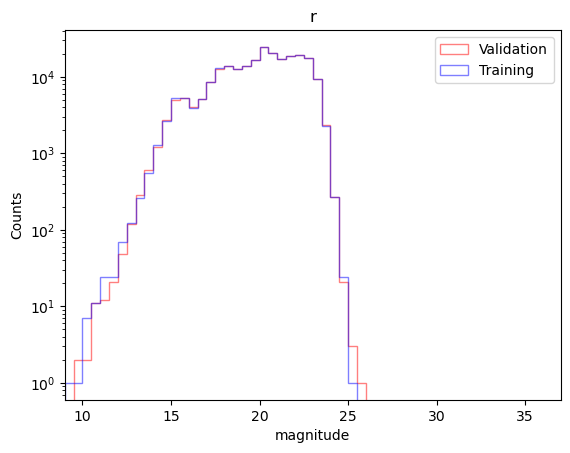

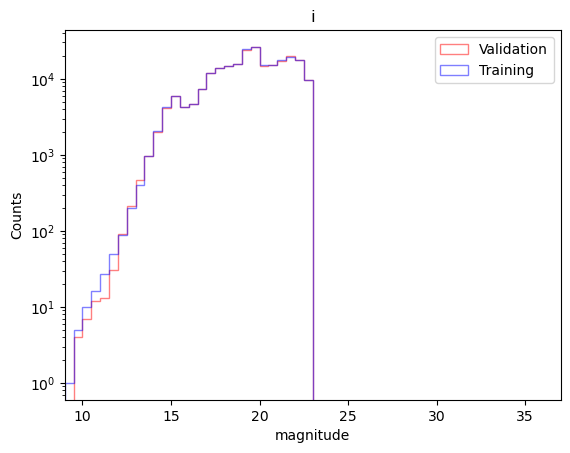

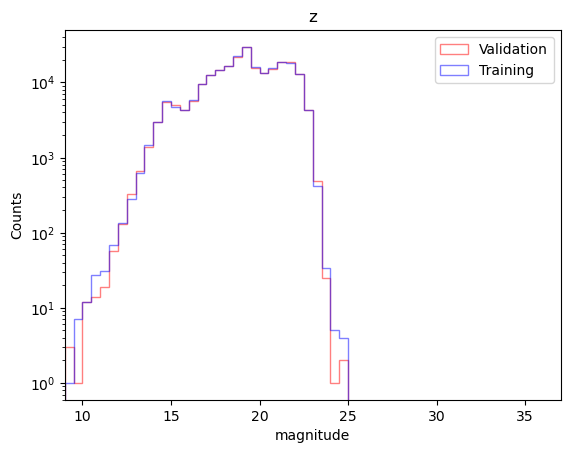

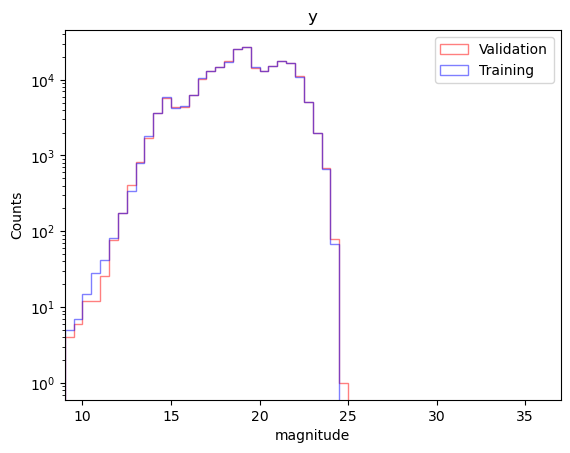

In [18]:
bands = ['g', 'r', 'i', 'z', 'y']
colors = ['blue', 'green', 'red', 'orange', 'purple']
plt.figure()
bins = np.linspace(9, 37, 57)
for i, (band, color) in enumerate(zip(bands,colors)):
    plt.hist(validation[f'mag_auto_{band}_dered'], histtype='step', bins=bins, label='Validation', alpha = 0.5, edgecolor = "red")
    plt.hist(training[f'mag_auto_{band}_dered'], histtype='step', bins=bins, label='Training', alpha = 0.5, edgecolor = "blue")
    plt.title(band)
    plt.xlabel("magnitude")
    plt.ylabel("Counts")
    plt.xlim(9, 37)
    plt.yscale('log')
    plt.legend()
    plt.show()

Text(0.5, 1.0, 'Color x Color')

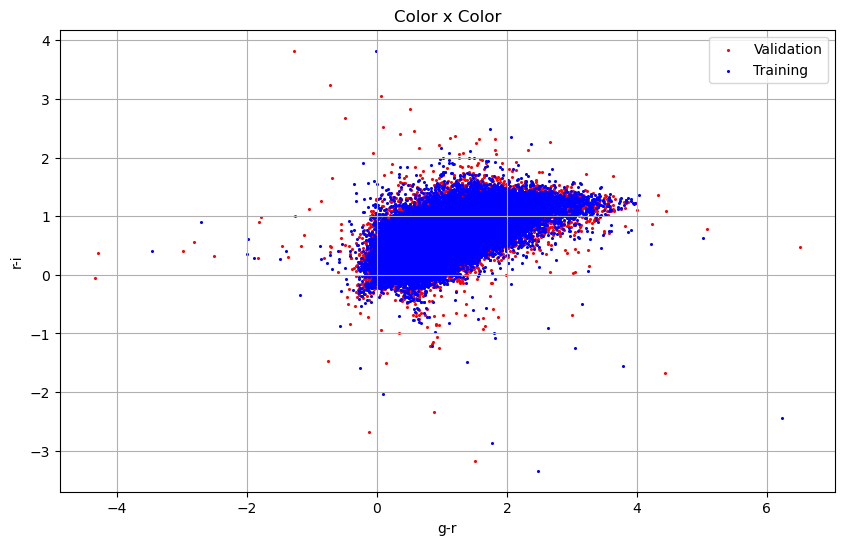

In [19]:
gr_val = validation['mag_auto_g_dered']-validation['mag_auto_r_dered']
ri_val = validation['mag_auto_r_dered']-validation['mag_auto_i_dered']
iz_val = validation['mag_auto_i_dered']-validation['mag_auto_z_dered']
gr_trai = training['mag_auto_g_dered']-training['mag_auto_r_dered']
ri_trai = training['mag_auto_r_dered']-training['mag_auto_i_dered']
iz_trai = training['mag_auto_i_dered']-training['mag_auto_z_dered']

plt.figure(figsize = (10,6))
plt.scatter(gr_val,ri_val,color = 'red', s =1.5, label = 'Validation')
plt.scatter(gr_trai,ri_trai,color = 'blue', s=1.5, label = 'Training')
plt.xlabel('g-r')
plt.ylabel('r-i')
plt.legend()
plt.grid()
plt.title('Color x Color')

## Saving the data

In [20]:

del validation['coadd_object_id'],validation['spec_id'], validation['source'], validation['err_z'], validation['flag'], validation['flag_des'], validation['ra'], validation['dec']
del training['coadd_object_id'],training['spec_id'], training['source'], training['err_z'], training['flag'], training['flag_des'], training['ra'], training['dec']


In [21]:
validation.columns = ['#zs','g','r','i','z','y','eg','er','ei','ez','ey','g-r','r-i','i-z','z-y']
training.columns = ['#zs','g','r','i','z','y','eg','er','ei','ez','ey','g-r','r-i','i-z','z-y']

In [22]:
validation['eg-r'] = validation['eg']-validation['er']
validation['er-i'] = validation['er']-validation['ei']
validation['ei-z'] = validation['ei']-validation['ez']
validation['ez-y'] = validation['ez']-validation['ey']
training['eg-r'] = training['eg']-training['er']
training['er-i'] = training['er']-training['ei']
training['ei-z'] = training['ei']-training['ez']
training['ez-y'] = training['ez']-training['ey']

/tmp/ipykernel_440/2560928353.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['eg-r'] = validation['eg']-validation['er']
/tmp/ipykernel_440/2560928353.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['er-i'] = validation['er']-validation['ei']
/tmp/ipykernel_440/2560928353.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

In [209]:
validation.to_csv('/home/iago.dias/MLZ/mlz/test/validation.DR2', sep=' ', index = False)
training.to_csv('/home/iago.dias/MLZ/mlz/test/training.DR2', sep=' ', index = False)

In [21]:
validation.to_csv('/home/iago.dias/Plots-TPZ/iago/ml_analyses/validation', sep=' ', index = False)
training.to_csv('/home/iago.dias/Plots-TPZ/iago/ml_analyses/training', sep=' ', index = False)

In [23]:
validation


,#zs,g,r,i,z,y,eg,er,ei,ez,ey,g-r,r-i,i-z,z-y,eg-r,er-i,ei-z,ez-y
1,0.061486,15.573085,14.723259,14.351587,14.087938,13.897467,0.000942,0.000599,0.000751,0.000951,0.002718,0.849826,0.371672,0.263649,0.190472,0.000343,-0.000152,-0.000199,-0.001768
3,0.062580,16.365583,15.548836,15.170586,14.885013,14.718538,0.000950,0.000615,0.000838,0.000894,0.002693,0.816748,0.378250,0.285573,0.166474,0.000335,-0.000223,-0.000056,-0.001799
4,0.007502,15.947645,15.638826,15.555540,15.442549,15.400026,0.001518,0.001496,0.001875,0.003656,0.009628,0.308819,0.083286,0.112991,0.042522,0.000023,-0.000379,-0.001781,-0.005973
5,0.064108,15.942881,15.511679,15.338929,15.181005,15.040759,0.000589,0.000473,0.000765,0.001170,0.002561,0.431202,0.172750,0.157925,0.140245,0.000116,-0.000292,-0.000404,-0.001392
7,0.301409,17.726744,17.574804,17.564592,17.353552,17.593048,0.000715,0.000725,0.001043,0.001577,0.006892,0.151939,0.010212,0.211040,-0.239496,-0.000010,-0.000318,-0.000534,-0.005315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464295,0.058900,17.374983,16.523035,16.135567,15.853971,15.750452,0.000852,0.000565,0.000648,0.000996,0.002743,0.851948,0.387468,0.281595,0.103519,0.000287,-0.000083,-0.000348,-0.001746
464298,0.050500,17.958733,17.191545,16.868324,16.628702,16.528030,0.001816,0.001201,0.001414,0.002183,0.006711,0.767187,0.323221,0.239622,0.100672,0.000615,-0.000213,-0.000769,-0.004528
464299,0.102600,18.496002,17.763803,17.419668,17.217525,17.106100,0.003782,0.002348,0.002800,0.005497,0.013728,0.732199,0.344135,0.202143,0.111425,0.001434,-0.000452,-0.002697,-0.008231
464301,0.051699,16.013577,15.198119,14.828176,14.557984,14.418472,0.000752,0.000566,0.000617,0.000919,0.002632,0.815457,0.369943,0.270192,0.139512,0.000186,-0.000051,-0.000302,-0.001713
